#Задача 1.  МНК или SVD.

**Облако точек.**

Скачайте файл, содержащий координаты облака точек в трехмерном пространстве, и распакуйте его с помощью numpy:
with np. load('data_distance_svd.npz') as data:
$$
x p, y p, z p=\text { data }\left[' x p^{\prime}\right], \text { data['yp'], data ['zp'] }
$$
Массивы содержат координаты точек: первая точка имеет координаты (хр [0], ур [0], zр [0] ), вторая точка - координаты $(\mathrm{xp}[1], \mathrm{yp}[1], \mathrm{zp}[1])$ и т.д. Нарисуйте точки на трехмерном графике. Можно заметить, что точки группируются вблизи некоторой плоскости. Задача состоит в том, чтобы построить данную плоскость. В качестве критерия выберем следующий: назовем наилучшей такую плоскость, что сумма квадратов ортогональных расстояний от точек до этой плоскости минимальна. Изобразите найденную плоскость на трёхмерном графике с облаком точек. 


**Указание 1**. 

Пусть плоскость с вектором нормали $\vec{n}$ проходит через точку с координатами $\vec{c}$. Тогда расстояние от точки $\vec{p}$ до плоскости дается скалярным произведением $\langle(\vec{p}-\vec{c}) \cdot \vec{n}\rangle .$ Таким образом, задача поиска наилучшей плоскости сводится к задаче наименьших квадратов относительно единичного вектора нормали $\vec{n}$.

**Указание 2**.

Эту задачу МНК можно решить через МНК непосредственно, а можно и через SVD.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Загружаем данные

with np.load('data_distance_svd.npz') as data:
    xp, yp, zp = data['xp'], data['yp'], data['zp']

data = np.vstack((xp, yp, zp))
A = []
B = []

for i in range(50):
    A.append([xp[i], yp[i], i])  # Реализуем матричное представление данных  
    B.append(zp[i])
# здесь мог бы быть ваш код  

ax = fig.add_subplot(111, projection='3d')  # строим плоскость
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.scatter(xp, yp, zp)
plt.show()

**Решение**

Используем встроенное в нампай  linalg.lstsq() которое,решает задачу поиска наименьших квадратов для линейного матричного уравнения. Допишем в указанное место следующий код:


solution = np.linalg.lstsq(np.matrix(A), np.matrix(B).T, rcond=None)


fig = plt.figure()

xx, yy = np.meshgrid(range(10), range(10))

z = (float(solution[0][0]) * xx + float(solution[0][1]) * yy + float(solution[0][2]))

Тогда:

(10, 10) (10, 10) (10, 10)
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]


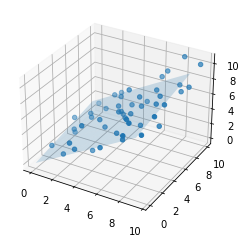

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные
with np.load('data_distance_svd.npz') as data:
    xp, yp, zp = data['xp'], data['yp'], data['zp']

data = np.vstack((xp, yp, zp))
A = []
B = []

for i in range(50):
    A.append([xp[i], yp[i], i])  # Реализуем матричное представление данных  
    B.append(zp[i])
# Используем встроенное в нампай  linalg.lstsq() которое,решает задачу поиска наименьших квадратов для линейного матричного уравнения.
solution = np.linalg.lstsq(np.matrix(A), np.matrix(B).T, rcond=None)

fig = plt.figure()
xx, yy = np.meshgrid(range(10), range(10))
z = (float(solution[0][0]) * xx + float(solution[0][1]) * yy + float(solution[0][2]))
print(xx.shape, yy.shape, z.shape)
ax = fig.add_subplot(111, projection='3d')  # строим плоскость
ax.plot_surface(xx, yy, z, alpha=0.2)
print(yy)
ax.scatter(xp, yp, zp)
plt.show()


#Задание 2. Погрешности.

Рассмотрим два тела массами $M_{1}$ и $M_{2}$, расположенных на расстоянии $r$ друг от друга, Сила гравитационного взаимодействия между телами дается формулой
$$
F=\frac{G M_{1} M_{2}}{r^{2}}
$$ 

где $G$ - гравитационная постоянная, значение которой считаем известным точно.
Предположим, что значения масс известны с погрешностями измерений:
$$
\begin{aligned}
&M_{1}=40 \times 10^{4} \pm 0.05 \times 10^{4} \mathrm{~kg} \\
&M_{2}=30 \times 10^{4} \pm 0.1 \times 10^{4} \mathrm{~kg}
\end{aligned}
$$
и $r=3.2 \pm 0.01 \mathrm{~m}$.

(a) Используя стандартные правила вычисления погрешностей, вычислите значение и погрешность силы взаимодействия $F$.

(b) Синтетический набор данных: будем интерпретировать заданное значение с погрешностью как нормальное распределение с заданным средним и стандартным отклонением. Сгенерируйте $10^{5}$ случайных значений каждого из параметров $\left(M_{1}, M_{2}\right.$ и $r$ ), согласно заданным значениям. Для каждого набора реализаций вычислите значение гравитационной силы.

(с) Постройте гистограмму (plt.hist) значений силы и график нормального распределения со средним и дисперсией из предыдущего пункта. (Результаты должны получиться согласованными).

(d) Повторите задание для следующего набора данных:
$$
\begin{aligned}
M_{1} &=40 \times 10^{4} \pm 2 \times 10^{4} \mathrm{~kg} \\
M_{2} &=30 \times 10^{4} \pm 10 \times 10^{4} \mathrm{~kg} \\
r &=3.2 \pm 1.0 \mathrm{~m}
\end{aligned}
$$



In [ ]:
import numpy as np

def raschet(M1, M2, r, dM1, dM2, dr):
  # здесь мог бы быть ваш код
  return F, dF, eF #dF - абсолютная погрешность; eF - относительная погрешность.

In [ ]:
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.stats import norm

# здесь мог бы быть ваш код

**Решение.**

In [49]:
import numpy as np

M1 = 40e+4
M2 = 30e+4
r = 3.2
dM1 = 5e2
dM2 = 1e3
dr = 1e-2

def raschet(M1, M2, r, dM1, dM2, dr):
    F = M1 * M2 / r**2
    dF = ((dM1 * M2 /r**2)**2 + (M1 * dM2 / r**2)**2 + (2 * M1 * M2 / r**3 * dr) ** 2) ** 0.5
    eF = dF / F
    return F, dF, eF #dF - абсолютная погрешность; eF - относительная погрешность.
F_0, dF_0, eF_0 = raschet(M1, M2, r, dM1, dM2, dr)
print(F_0, dF_0, eF_0)

11718749999.999998 84290412.60562532 0.007192781875680028


In [50]:
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.stats import norm

# здесь мог бы быть ваш код
M1_normal = np.random.normal(M1, dM1, 10000)
M2_normal = np.random.normal(M2, dM2, 10000)
r_normal = np.random.normal(r, dr, 10000)

In [51]:
F_normal, dF_normal, eF_normal = raschet(M1_normal, M2_normal, r_normal, dM1, dM2, dr) 

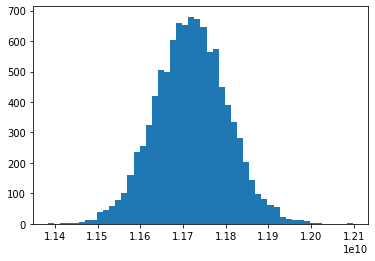

In [52]:
plt.hist(F_normal, bins = 50); 

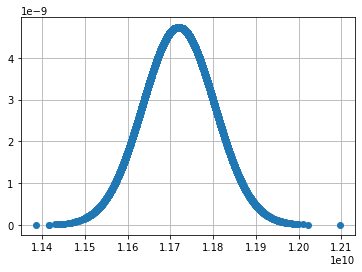

In [53]:
from scipy.stats import norm

plt.plot(F_normal, norm.pdf(F_normal, F_0, dF_0), "o")
plt.grid()

In [54]:
import numpy as np

M1 = 40e+4
M2 = 30e+4
r = 3.2
dM1 = 2e4
dM2 = 10e4
dr = 1

def raschet(M1, M2, r, dM1, dM2, dr):
    F = M1 * M2 / r**2
    dF = ((dM1 * M2 /r**2)**2 + (M1 * dM2 / r**2)**2 + (2 * M1 * M2 / r**3 * dr) ** 2) ** 0.5
    eF = dF / F
    return F, dF, eF #dF - абсолютная погрешность; eF - относительная погрешность.
F_0, dF_0, eF_0 = raschet(M1, M2, r, dM1, dM2, dr)
print(F_0, dF_0, eF_0)

11718749999.999998 8321435700.301827 0.7100958464257561


In [55]:
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.stats import norm

# здесь мог бы быть ваш код
M1_normal = np.random.normal(M1, dM1, 10000)
M2_normal = np.random.normal(M2, dM2, 10000)
r_normal = np.random.normal(r, dr, 10000)

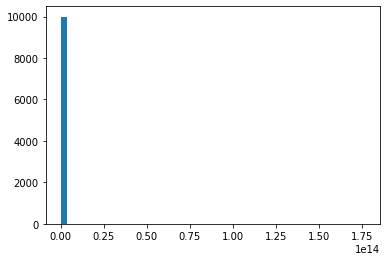

In [56]:
F_normal, dF_normal, eF_normal = raschet(M1_normal, M2_normal, r_normal, dM1, dM2, dr)
plt.hist(F_normal, bins = 50);

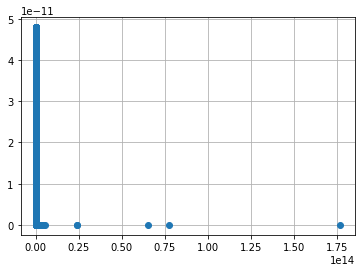

In [57]:
from scipy.stats import norm

plt.plot(F_normal, norm.pdf(F_normal, F_0, dF_0), "o")
plt.grid()

#Задача 3.  Спектры.

Рассмотрите матрицу $A$ размера $32 \times 32$, задаваемую следующей формулой:
$$
A_{i j}=-\delta_{i, j}+\delta_{i, j-1}+\delta_{i, j-2}
$$
- Найдите спектр матрицы $A$.
- Используя функцию scipy.linalg.expm, постройте $\left\|e^{A t}\right\|_{2}$ как функцию $t$ на интервале $0 \leq t \leq 50 .$ 

**Примечание.**

В задаче может быть ещё нахождение псевдоспектра, степенной метод, обратные итерации.

**Решение.** 

In [45]:
import numpy as np
from scipy.sparse import spdiags
def create_matrixA(n):
  d, d1, d2 = -np.ones(n), np.ones(n), np.ones(n)
  diags, data = np.array([0, 1, 2]), [d, d1, d2]
  A = spdiags(data, diags, n, n).toarray()
  return(A)
print(create_matrixA(32))

[[-1.  1.  1. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  1.  1.]
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]]


In [46]:
A = create_matrixA(32)
w, v = np.linalg.eig(A)
print(w)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]
2.6570073558003156


<ipython-input-47-8dabcdaa0e2a>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i] = max(w)**0.5


[1.00000000e+00 2.65700736e+00 7.02842395e+00 1.84583288e+01
 4.79810469e+01 1.22930659e+02 3.08537605e+02 7.51945419e+02
 1.75900822e+03 3.89926469e+03 8.09810529e+03 1.56359899e+04
 2.79743360e+04 4.63905043e+04 7.15053349e+04 1.02867001e+05
 1.38763384e+05 1.76362202e+05 2.12159722e+05 2.42611466e+05
 2.64766339e+05 2.76741684e+05 2.77943162e+05 2.69016757e+05
 2.51589581e+05 2.27893783e+05 2.00371444e+05 1.71337033e+05
 1.42740973e+05 1.16045469e+05 9.21993586e+04 7.16853793e+04
 5.46096972e+04 4.08070235e+04 2.99416736e+04 2.15927457e+04
 1.53183895e+04 1.06990663e+04 7.36265290e+03 4.99554784e+03
 3.34407196e+03 2.20991602e+03 1.44254677e+03 9.30611024e+02
 5.93616660e+02 3.74580780e+02 2.33924620e+02 1.44635705e+02
 8.85751380e+01 5.37455847e+01 3.23234208e+01]


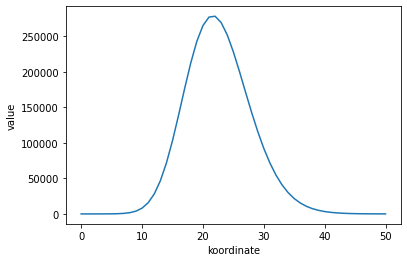

In [47]:
import scipy.linalg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#help(scipy.linalg.expm)
t = np.arange(0, 51, 1)
print(t)
B = scipy.linalg.expm(A)
w, v = np.linalg.eig(B.T @ B)
norm = max(w)**0.5
print(norm)
y = np.zeros(51)
for i in range(51):
  B = scipy.linalg.expm(A*i)
  w, v = np.linalg.eig(B.T @ B)
  y[i] = max(w)**0.5
plt.plot(t, y)
plt.ylabel('value')
plt.xlabel('koordinate')
print(y)


# Задача 4. Вариант 1. Фрактал Ньютона.

**Фрактал Ньютона.**
 
 Рассмотрим уравнение $x^3=1$. Оно имеет три решения в комплексной плоскости, $x_k=\exp \{i 2 \pi k / 3\}, k=0,1,2$. В зависимости от начального приближения, итерации Ньютона сойдутся к одному из этих решений (для получения комплексно-значного корня необходимо стартовать с начального значения с ненулевой мнимой частью). Постройте в комплексной плоскости бассейны притяљения корней. Для этого проведите серию вычислений с начальными условиями на сетке в комплексной плоскости переменной $x$. Далее раскрасьте сетку в три цвета согласно значению корня, к которому сошлись итерации (удобно для каждого значения начальных условий выполнять фиксированное число итераций).

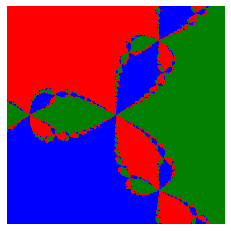

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# A list of colors to distinguish the roots.
colors = ['b', 'r', 'g', 'y']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**3 - 1
fprime = lambda z: 3*(z**2)

plot_newton_fractal(f, fprime, n=400)

#Задача 4. Вариант 2.  Метод простой итерации в уравнениях.


Реализуйте метод простой итерации для нахождения решения следующих уравнений относительно $x$ :

(i) $1+\cos x=0$

(ii) $x^2=2$.

Используйте следующие итерационные формулы:

(i) $x_{k+1}=x_k+\frac{\cos x_k+1}{\sin x_k}$

(ii) $x_{k+1}=\frac{1}{2}\left(x_k+\frac{2}{x_k}\right)$.

В обоих случаях, стартуйте с $x_0=1$. Какова сходимость итераций (линейная/квадратичная) для случаев (i) и (ii)?

#Задача 4. Вариант 3.  Метод простой итерации в матрицах.


Реализуйте метод итераций для решения системы линейных уравнений (метод Якоби). Для этого перепишите уравнение $A x=b$, выделив диагональную часть матрицы $A:$
$$
A=D+(A-D) \text {, }
$$
в виде
$$
x_{n+1}=B x_{n}+c
$$
где $B=D^{-1}(D-A) .$ 

Найдите $c . $ 
Создавайте случайную матрицу с диагональным доминированием следующим способом:

n=10

A = rnd.uniform (size=(n,n))+np.diag([15]*n)

b = rnd.uniform (size=n)

Вычислите норму L2 (евклидову) соответствующей матрицы $B$ и выполните 22 итерации метода Якоби, распечатывая вектор х через каждые три итерации. В качестве начального приближения возьмите вектор из единиц. Убедитесь, что результируюший вектор $x$ действительно решает исходную систему.
Матрица $A$, с которой вы работали выше, по построению доминируется диагональю. Что произойдёт, если уменьшать величину диагональных элементов? Проверьте сходимость итераций Якоби (вычислите также норму матрицы $B$ ).

In [ ]:
import numpy as np
from numpy import linalg as LA
rnd = np.random. RandomState(1234)
n=10
A = rnd.uniform (size=(n,n))+np.diag([15]*n)
b = rnd.uniform (size=n)

 # здесь мог бы быть ваш код

# Задача 5. Одномерный кристалл.

**Одномерный кристалл.** 

Рассмотрите одномерный кристалл с двумя атомами различной массы  $m$  и $M$   в элементарной ячейке, состоящий из $N$ элементарных ячеек (всего $2 N$ атомов), замкнутых в кольцо (периодические граничные условия).
- Считая, что соседние атомы на кольце соединены одинаковыми пружинами с упругой константой $k=1$, выпишите уравнения движения (уравнения Ньютона) на положения атомов $x_{i} .$
- Предполагая, что все атомы движутся с одной и той же частотой, $x_{i}(t)=u_{i} e^{-i \omega t}$, перепишите найденные выше уравнения в виде системы линейных уравнений на вектор u. Составьте матрицу A, спектр которой определяет частоты нормальных мод.
- Используя np. linalg.eig, найдите спектр матрицы $A$ (возьмите $N=100$ и $M / m=2$ ). Постройте гистограмму собственных значений. Обратите внимание, что в спектре есть щель - 'запрещенная' область энергии внутри спектра, которая разделяет 'разрешенную' область на две части.
- Постройте пространственную структуру численно определённой нормальной моды $u_{i}$ вблизи минимальной и максимальной энергий спектра.
- Tenepь paccмoтрите цепочку со случайным $k$, взятым из однородного распределения на отрезке [1, 10] и $M / m=2 .$ Найдите её спектр (постройте гистограмму) и изобразите пространственную структуру какой-то моды $u$ из середины спектра.

**Решение.**

\begin{aligned}
&m_{i}= \begin{cases}m,  \text { i чётное } \\ \text { M, i  нечётное }\end{cases}\\
&m_{i} \ddot{x}=k\left(x_{i+1}-x_{i}\right)-k\left(x_{i}-x_{i-1}\right)
\end{aligned}

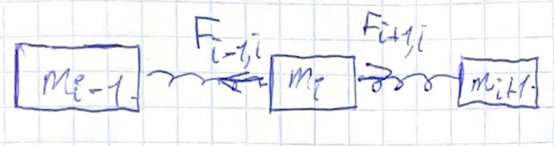  


После подстановки u в уравнения получается система линейных уравнений с нулевой правой частью, матрица B которой имеет вид: 

$b_{2} \in(1, \ldots, 2 N-2)$:
$b_{i i}=m_{i} w^{2}-2 k$ \
$b_{i i-1}=k ;\ b_{i, i+1}=k$;

$i=2 N - 1: \ b_{2 N - 1, 2 N - 2}=k$;  
$b_{2 N - 1, 2 N - 1}=m_{i} w^{2}-2 k$;  
$b_{2 N - 1, 0}=k ;$

$b_{00}=m_{0} w^{2}-2 k$;\
$b_{01}=k$; \
$b_{02 N-1}=k$ 

Определитель этой матрицы равен нулю - это условие нахождения частот.


$A=\frac{-B}{m_{i}}+\lambda E \quad, \quad \lambda=\omega^{2}$

$\left[   
\quad a_{i i-1}=\frac{k}{m_{i}}\right.$
$a_{i i}=\frac{2 k}{m_{i}}, \quad a_{i i+1}=\frac{k}{m_{i}}$

${a}_{00}=\frac{2 k}{m_{0}} ;  \quad a_{0 1}=\frac{k}{m_{0}}; $
$a_{0,2 N-1}=\frac{k}{m_{0}}$

${a}_{2 N-1, 2 N-1}=\frac{2 k}{m_{2 N-1}} ;  \quad a_{2 N-1, 0}=\frac{k}{m_{0}}; $
$a_{2 N-1, 2 N-2}=\frac{k}{m_{0}}$

Умножим все элементы матрицы на M, получаем:


$$A=k \cdot\left(\begin{array}{ccccccc}
2 \kappa & -\kappa & 0 & & 0 & 0 & -\kappa \\
-1 & 2 & -1 & \cdots & 0 & 0 & 0 \\
0 & -\kappa & 2 \kappa & & 0 & 0 & 0 \\
& \vdots & & \ddots & & \vdots & \\
0 & 0 & 0 & & 2 & -1 & 0 \\
0 & 0 & 0 & \cdots & -\kappa & 2 \kappa & -\kappa \\
-1 & 0 & 0 & & 0 & -1 & 2
\end{array}\right) $$

In [34]:
import numpy as np
from scipy.sparse import spdiags
def create_matrixA(N, k, kappa):
  n = 2*N
  d, d1, d2 = np.zeros(n), np.zeros(n), np.zeros(n)
  d[0:n:2] += 2*kappa; d[1:n:2] += 2
  d1[0:n:2] += -1;      d1[1:n:2] += -kappa
  d2[0:n:2] += -1;     d2[1:n:2] += -kappa
  diags, data = np.array([0, -1, 1]), [d, d1, d2]
  A = spdiags(data, diags, n, n).toarray()
  A[0,n-1], A[n-1, 0] = -kappa, -1
  return(k*A)
print(create_matrixA(3, 1, 1))


[[ 2. -1.  0.  0.  0. -1.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [-1.  0.  0.  0. -1.  2.]]


[1.926766772174764e-08, 1.9518335238774924, 1.9584456212435353, 1.96457450145738, 1.975376681190278, 1.9800473154331102, 1.9842294026289566, 1.9879219109103619, 1.991123929206157, 1.999999999999998, 1.993834667466257, 1.9977797499239383, 1.999753264963318, 1.9997532649633256, 1.9990131207314616, 1.9990131207314659, 1.9977797499239502, 1.9960534568565445, 1.996053456856543, 1.970218652309554, 1.944739840795354, 1.9938346674662522, 1.9911239292061558, 1.987921910910367, 0.031414634623636986, 0.0314146346236629, 0.09421290141929274, 0.09421290141928215, 0.12558103905863222, 0.12558103905862675, 1.9842294026289597, 0.21946862218208993, 0.18821662663702562, 0.156918191455696, 0.2818024638751585, 0.2506664671286099, 1.9645745014573848, 1.9800473154331126, 1.9753766811902784, 1.9584456212435357, 1.9702186523095497, 0.18821662663702354, 0.15691819145568808, 0.21946862218209653, 1.9518335238774949, 1.9371663222572633, 0.25066646712861024, 1.929114836915597, 1.9447398407953516, 0.312868930080456

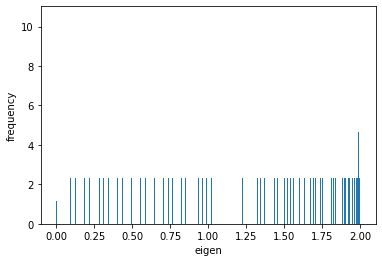

In [35]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
N = 100
k = 1; kappa = 1
A = create_matrixA(N, k, kappa)
w, v = np.linalg.eig(A) # собственные значения w и векторы v
wr = [np.real(t**0.5) for t in w if (np.imag(t) == 0)]
print(wr)
plt.hist(wr, density=True, bins=462)  # density=False would make counts
plt.ylabel('frequency')
plt.xlabel('eigen')
print(len(wr))

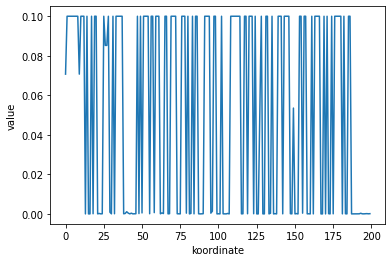

In [36]:
for i in range(len(w)):
  if (np.imag(w[i]) == 0) and (np.real(w[i]) == min(np.real(w))):
    plt.plot(abs(v[i]))
    plt.ylabel('value')
    plt.xlabel('koordinate')
    break


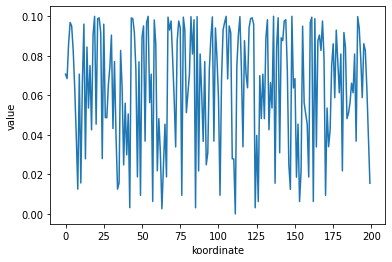

In [37]:
for i in range(len(w)):
  if (np.imag(w[i]) == 0) and (np.real(w[i]) == max(np.real(w))):
    plt.plot(abs(v[i]))
    plt.ylabel('value')
    plt.xlabel('koordinate')
    break

198


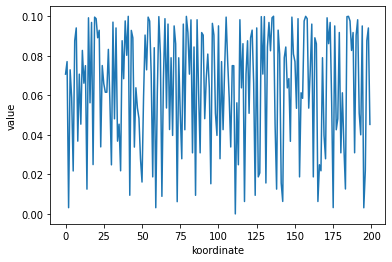

In [38]:
vr = [t for t in v if (np.imag(t[0]) == 0)]
vr = []
wwr = np.sort(wr)
for i in range(len(w)):
  if np.imag(w[i]) == 0:
    vr.append(v[i])
ind = len(vr) // 2
for i in range(len(vr)):
  if wr[i] == wwr[ind]:
    ind = i
    break
plt.plot(abs(vr[ind]))
plt.ylabel('value')
plt.xlabel('koordinate')
print(len(vr))

[5.776070264155104, 5.776887374248108, 5.777691932236766, 5.778483932583802, 5.779263369846131, 5.780030238674549, 5.8023781713334275, 5.802257275222792, 5.8021236561384715, 5.801977314960709, 5.801818252653811, 5.780784533813272, 5.8014619689302975, 5.801646470266153, 5.802486343674114, 5.802791782349459, 5.80258179153256, 5.801264749863027, 5.802664514280323, 5.801054814365447, 5.78152625009986, 5.802734511372865, 5.800832163822994, 5.800596799705614, 5.782255382464521, 5.782971925930143, 5.80289359881477, 5.800348723567764, 5.800087937048579, 5.783675875611772, 5.799814441871931, 5.784367226716359, 5.799528239846491, 5.7985934120395655, 5.785045974542451, 5.798256402406835, 5.794652268385703, 5.795103456029951, 5.795541968115631, 5.794188408193143, 5.795967801719349, 5.7937118785495265, 5.797906696245447, 5.793222682639375, 5.796380954004316, 5.785712114479842, 5.792720823734512, 5.78636564200948, 5.802887235233358, 5.797544295875634, 5.792206305194488, 5.788853540837189, 5.80286814

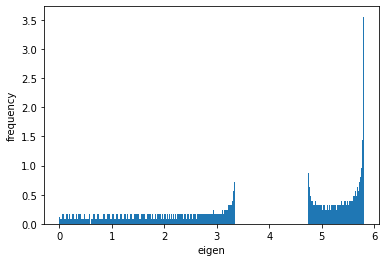

In [44]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
N = 1000
k = np.random.default_rng().uniform(1.0, 10.0)
kappa = 2
A = create_matrixA(N, k, kappa)
w, v = np.linalg.eig(A) # собственные значения w и векторы v
wr = [np.real(t**0.5) for t in w if (np.imag(t) == 0)]
print(wr)
plt.hist(wr, density=True, bins=462)  # density=False would make counts
plt.ylabel('frequency')
plt.xlabel('eigen')
print(len(wr))
print('k = ', k)

2000


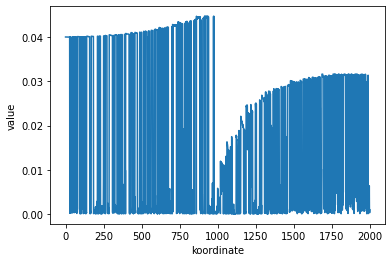

In [40]:
vr = [t for t in v if (np.imag(t[0]) == 0)]
vr = []
for i in range(len(w)):
  if np.imag(w[i]) == 0:
    vr.append(v[i])
ind = len(vr) // 2
plt.plot(abs(vr[ind]))
plt.ylabel('value')
plt.xlabel('koordinate')
print(len(vr))

2000


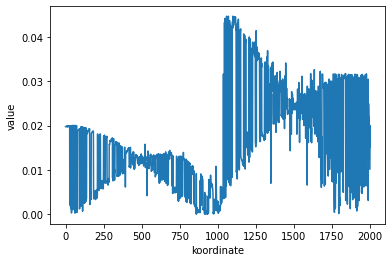

In [41]:
plt.plot(abs(vr[ind+1]))
plt.ylabel('value')
plt.xlabel('koordinate')
print(len(vr))

2000


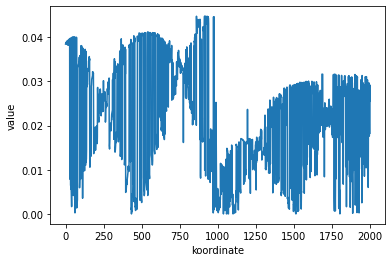

In [42]:
plt.plot(abs(vr[ind+2]))
plt.ylabel('value')
plt.xlabel('koordinate')
print(len(vr))